<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class7/program01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v3으로 정지 영상에서 물체 검출하기

In [1]:
import numpy as np
import cv2 as cv
import sys

from google.colab.patches import cv2_imshow

In [2]:
# 사전 학습 모델을 읽어 YOLO 구성
def construct_yolo_v3():
  f = open('/content/drive/MyDrive/컴퓨터비전/Class7/coco_names.txt', 'r')
  class_names = [line.strip() for line in f.readlines()]
  model = cv.dnn.readNet('/content/drive/MyDrive/컴퓨터비전/Class7/yolov3.weights', '/content/drive/MyDrive/컴퓨터비전/Class7/yolov3.cfg')
  layer_names = model.getLayerNames()
  out_layers = [layer_names[i-1] for i in model.getUnconnectedOutLayers()]
  return model, out_layers, class_names

In [3]:
# YOLO 모델로 물체를 검출
def yolo_detect(img, yolo_model, out_layers):
  height, width = img.shape[0], img.shape[1]
  test_img = cv.dnn.blobFromImage(img, 1.0/256, (448,448), (0,0,0), swapRB=True)
  yolo_model.setInput(test_img)
  output3 = yolo_model.forward(out_layers)
  box, conf, id = [], [], [] # 박스, 신뢰도, 부류 번호

  for output in output3:
    for vec85 in output:
      scores = vec85[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5: # 신뢰도 50% 이상인 경우만 취함
        centerx, centery = int(vec85[0]*width), int(vec85[1]*height)
        w, h = int(vec85[2]*width), int(vec85[3]*height)
        x, y = int(centerx-w/2), int(centery-h/2)
        box.append([x, y, x+w, y+h])
        conf.append(float(confidence))
        id.append(class_id)

  ind = cv.dnn.NMSBoxes(box, conf, 0.5, 0.4)
  objects = [box[i]+[conf[i]]+[id[i]] for i in range(len(box)) if i in ind]
  return objects

In [4]:
model, out_layers, class_names = construct_yolo_v3() # YOLO 모델 생성
colors = np.random.uniform(0, 255, size=(len(class_names), 3)) # 부류마다 색깔

In [5]:
img = cv.imread('/content/drive/MyDrive/컴퓨터비전/Class7/soccer.jpg')
if img is None: sys.exit('파일이 없습니다.')

In [6]:
res = yolo_detect(img, model, out_layers) # YOLO 모델로 물체 검출

In [7]:
# 검출된 물체를 영상에 표시
for i in range(len(res)):
  x1, y1, x2, y2, confidence, id = res[i]
  text = str(class_names[id]) + '%.3f'%confidence
  cv.rectangle(img, (x1,y1), (x2,y2), colors[id], 2)
  cv.putText(img, text, (x1,y1+30), cv.FONT_HERSHEY_PLAIN, 1.5, colors[id], 2)

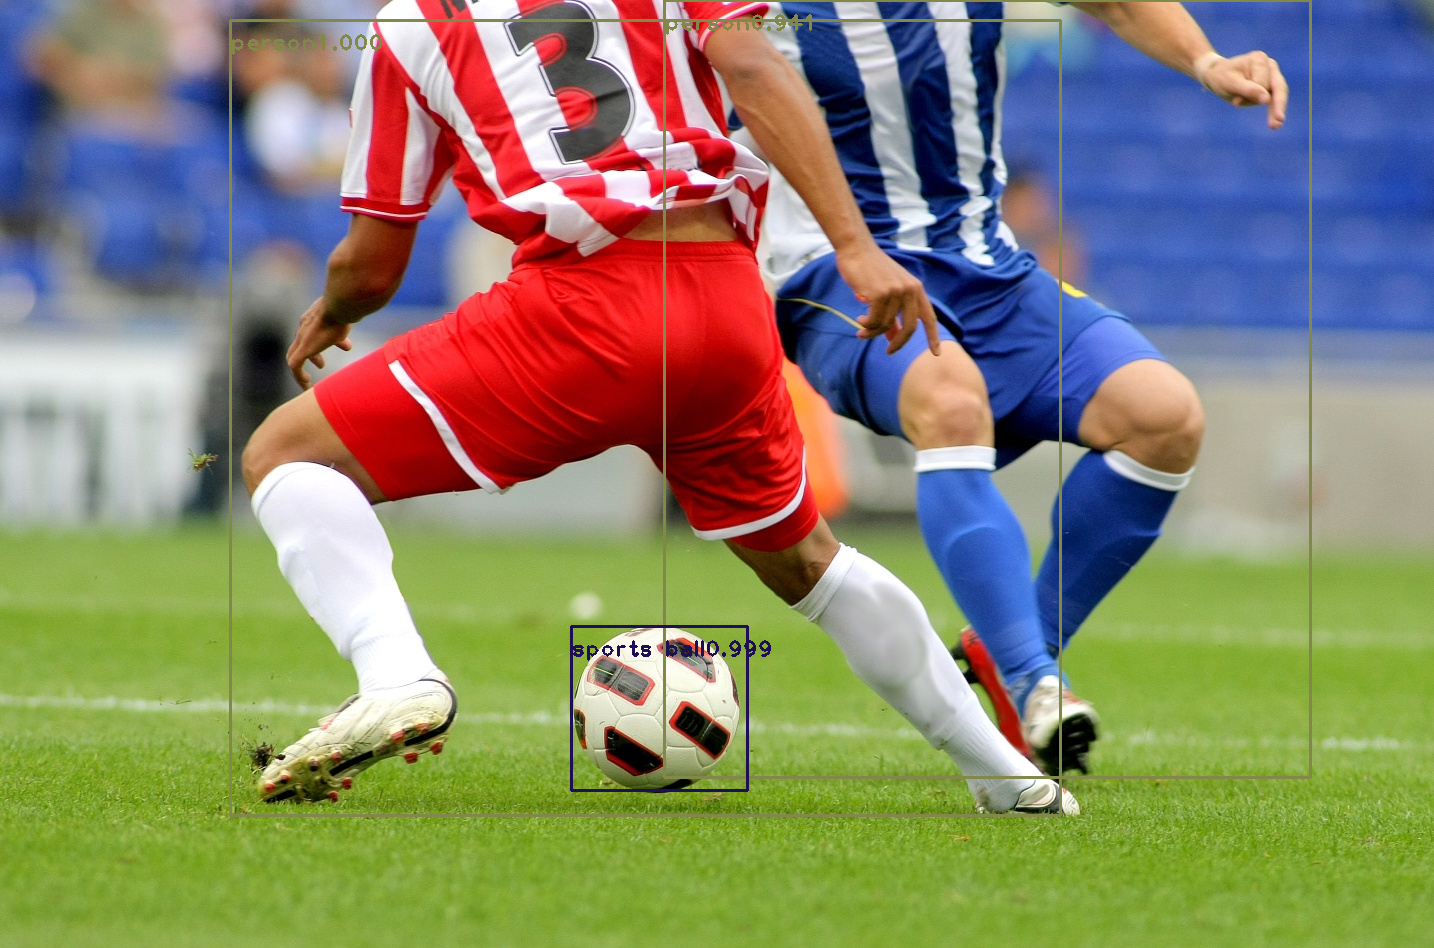

In [8]:
cv2_imshow(img)